### Objective:

To develop a machine learning model that forecasts PM2.5 pollution levels at the next hour using historical pollution and weather data from the previous hours.

We're working with a multivariate time series dataset containing pollution and weather data, and our goal is to frame a supervised learning forecasting problem where the pollution level at the next hour is predicted based on the previous hour(s)’ data.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\NEELAM SUSHMITHA\OneDrive\Documents\RAMANASOFT INTERNSHIP\Beijing PM2.5 Data Set.csv")

In [3]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


The dataset contains hourly records collected over five years at the US Embassy in Beijing. The features include:
| Feature | Description                                         |
| ------- | --------------------------------------------------- |
| `No`    | Row index (can be dropped)                          |
| `year`  | Year of the record                                  |
| `month` | Month of the record                                 |
| `day`   | Day of the record                                   |
| `hour`  | Hour of the record                                  |
| `pm2.5` | **PM2.5 pollution concentration** (target variable) |
| `DEWP`  | Dew Point                                           |
| `TEMP`  | Temperature                                         |
| `PRES`  | Atmospheric Pressure                                |
| `cbwd`  | Combined Wind Direction                             |
| `Iws`   | Cumulated Wind Speed                                |
| `Is`    | Cumulated Snow hours                                |
| `Ir`    | Cumulated Rain hours                                |


In [4]:
import pandas as pd
from datetime import datetime

# Custom parser function to combine date fields
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

# Load and parse dataset
dataset = pd.read_csv(
    r"C:\Users\NEELAM SUSHMITHA\OneDrive\Documents\RAMANASOFT INTERNSHIP\Beijing PM2.5 Data Set.csv",
    parse_dates=[['year', 'month', 'day', 'hour']],
    index_col=0,
    date_parser=parse
)

# Drop the 'No' column
dataset.drop('No', axis=1, inplace=True)

# Rename the columns
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'

# Fill missing values in 'pollution' column with 0
dataset['pollution'].fillna(0, inplace=True)

# Drop the first 24 rows (assumed as first 24 hours)
dataset = dataset[24:]

# Display the first 5 rows
print(dataset.head(5))

# Save the cleaned data to a new CSV
dataset.to_csv('pollution.csv')

C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_21480\3962592234.py:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  dataset = pd.read_csv(
C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_21480\3962592234.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv(
C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_21480\3962592234.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


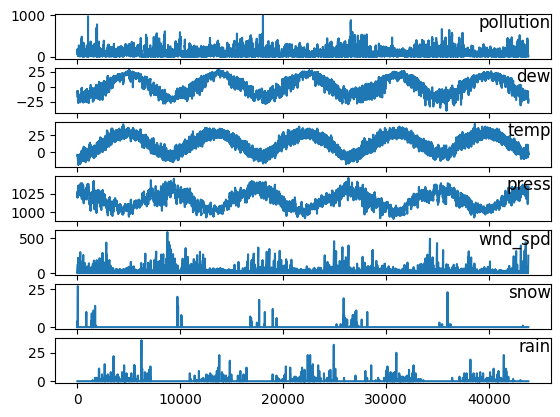

In [5]:
from matplotlib import pyplot
# load dataset
dataset = pd.read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [6]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [7]:
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  


In [8]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from matplotlib import pyplot

# Assuming train_X and train_y are already preprocessed and shaped as:
# train_X: (samples, timesteps, features)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72,
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50


C:\Users\NEELAM SUSHMITHA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 - 2s - 20ms/step - loss: 0.0569 - val_loss: 0.0466
Epoch 2/50
122/122 - 1s - 5ms/step - loss: 0.0359 - val_loss: 0.0430
Epoch 3/50
122/122 - 1s - 4ms/step - loss: 0.0214 - val_loss: 0.0371
Epoch 4/50
122/122 - 1s - 4ms/step - loss: 0.0172 - val_loss: 0.0313
Epoch 5/50
122/122 - 1s - 5ms/step - loss: 0.0157 - val_loss: 0.0195
Epoch 6/50
122/122 - 1s - 5ms/step - loss: 0.0149 - val_loss: 0.0160
Epoch 7/50
122/122 - 1s - 5ms/step - loss: 0.0147 - val_loss: 0.0150
Epoch 8/50
122/122 - 1s - 5ms/step - loss: 0.0148 - val_loss: 0.0154
Epoch 9/50
122/122 - 1s - 5ms/step - loss: 0.0147 - val_loss: 0.0150
Epoch 10/50
122/122 - 1s - 5ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 11/50
122/122 - 1s - 6ms/step - loss: 0.0146 - val_loss: 0.0146
Epoch 12/50
122/122 - 1s - 7ms/step - loss: 0.0146 - val_loss: 0.0147
Epoch 13/50
122/122 - 1s - 6ms/step - loss: 0.0146 - val_loss: 0.0142
Epoch 14/50
122/122 - 1s - 5ms/step - loss: 0.0145 - val_loss: 0.0140
Epoch 15/50
122/122 - 1s - 6ms/step - l

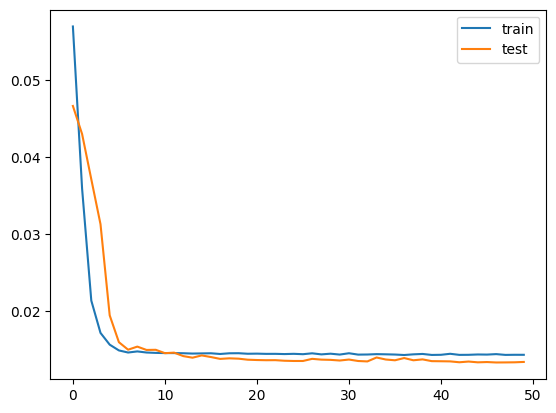

In [10]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [11]:
import numpy as np
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

# ===== Reshape test_X to 3D for LSTM prediction (samples, timesteps=1, features) =====
test_X_lstm = test_X.reshape((test_X.shape[0], 1, -1))

# ===== Predict =====
yhat = model.predict(test_X_lstm)  # Shape: (samples, 1)

# ===== Ensure test_X is 2D for inverse scaling =====
test_X_reshaped = test_X
if test_X_reshaped.ndim == 3:
    test_X_reshaped = test_X_reshaped.reshape((test_X_reshaped.shape[0], test_X_reshaped.shape[2]))

# ===== Invert scaling for predictions (yhat) =====
inv_yhat = concatenate((yhat, test_X_reshaped[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]  # Extract the target column

# ===== Invert scaling for actual values (test_y) =====
test_y_reshaped = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y_reshaped, test_X_reshaped[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]  # Extract the target column


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step


In [12]:
# ===== Calculate RMSE =====
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.455


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  
(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


C:\Users\NEELAM SUSHMITHA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
122/122 - 3s - 24ms/step - loss: 0.0635 - val_loss: 0.0528
Epoch 2/50
122/122 - 1s - 5ms/step - loss: 0.0468 - val_loss: 0.0513
Epoch 3/50
122/122 - 1s - 5ms/step - loss: 0.0290 - val_loss: 0.0374
Epoch 4/50
122/122 - 1s - 5ms/step - loss: 0.0179 - val_loss: 0.0267
Epoch 5/50
122/122 - 1s - 5ms/step - loss: 0.0156 - val_loss: 0.0160
Epoch 6/50
122/122 - 1s - 5ms/step - loss: 0.0150 - val_loss: 0.0146
Epoch 7/50
122/122 - 1s - 5ms/step - loss: 0.0149 - val_loss: 0.0138
Epoch 8/50
122/122 - 1s - 4ms/step - loss: 0.0148 - val_loss: 0.0136
Epoch 9/50
122/122 - 1s - 5ms/step - loss: 0.0149 - val_loss: 0.0136
Epoch 10/50
122/122 - 1s - 4ms/step - loss: 0.0148 - val_loss: 0.0136
Epoch 11/50
122/122 - 1s - 6ms/step - loss: 0.0148 - val_loss: 0.0135
Epoch 12/50
122/122 - 1s - 5ms/step - loss: 0.0147 - val_loss: 0.0135
Epoch 13/50
122/122 - 1s - 5ms/step - loss: 0.0147 - val_loss: 0.0134
Epoch 14/50
122/122 - 1s - 5ms/step - loss: 0.0147 - val_loss: 0.0135
Epoch 15/50
122/122 - 1s - 4

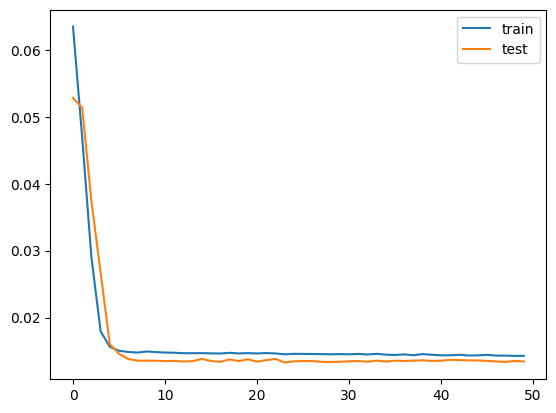

1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step


In [13]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [14]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.520


In [15]:
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)

In [16]:
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

(8760, 9) 8760 (8760,)


(43797, 32)
(8760, 24) 8760 (8760,)
(8760, 3, 8) (8760,) (35037, 3, 8) (35037,)
Epoch 1/50


C:\Users\NEELAM SUSHMITHA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 - 3s - 25ms/step - loss: 0.0483 - val_loss: 0.0662
Epoch 2/50
122/122 - 1s - 9ms/step - loss: 0.0280 - val_loss: 0.0541
Epoch 3/50
122/122 - 1s - 10ms/step - loss: 0.0219 - val_loss: 0.0310
Epoch 4/50
122/122 - 1s - 7ms/step - loss: 0.0213 - val_loss: 0.0253
Epoch 5/50
122/122 - 1s - 8ms/step - loss: 0.0206 - val_loss: 0.0221
Epoch 6/50
122/122 - 1s - 7ms/step - loss: 0.0201 - val_loss: 0.0204
Epoch 7/50
122/122 - 1s - 6ms/step - loss: 0.0198 - val_loss: 0.0195
Epoch 8/50
122/122 - 1s - 6ms/step - loss: 0.0192 - val_loss: 0.0192
Epoch 9/50
122/122 - 1s - 9ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 10/50
122/122 - 1s - 6ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 11/50
122/122 - 1s - 8ms/step - loss: 0.0179 - val_loss: 0.0179
Epoch 12/50
122/122 - 1s - 6ms/step - loss: 0.0178 - val_loss: 0.0181
Epoch 13/50
122/122 - 1s - 7ms/step - loss: 0.0172 - val_loss: 0.0179
Epoch 14/50
122/122 - 1s - 10ms/step - loss: 0.0170 - val_loss: 0.0180
Epoch 15/50
122/122 - 1s - 8ms/step -

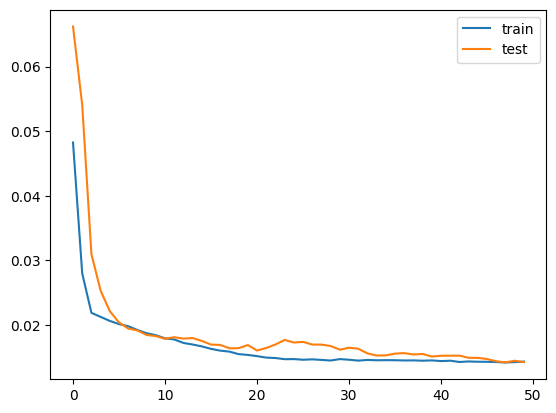

1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [17]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [18]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.692
